In [307]:
import csv 
import pandas as pd
import matplotlib.pyplot as plt
import re
%matplotlib inline  

with open('Data/2015.tsv','r') as tsv:
    data = [line.strip().split('\t') for line in tsv]
    
col_names = data[0]
df = pd.DataFrame(data, columns=col_names)
df = df[1:]

#open code_sex.csv and convert it to a DataFrame
with open('Data/code_sex.csv','r') as csv:
    sex_descrip = [line.strip().split(',') for line in csv]

sex_header = sex_descrip[0]
df_sex = pd.DataFrame(sex_descrip, columns=sex_header)
df_sex = df_sex[1:]
indexed_df_sex = df_sex.set_index('Code')

#open code_body_part.csv and convert it to a DataFrame
with open('Data/code_body_part.csv','r') as csv:
    body_part_descrip = [line.strip().split(',') for line in csv]

body_part_header = body_part_descrip[0]
df_body_part = pd.DataFrame(body_part_descrip, columns=body_part_header)
df_body_part = df_body_part[1:]
indexed_df_body_part = df_body_part.set_index('Code')

#open code_diagnosis.csv and convert it to a DataFrame
with open('Data/code_diagnosis.csv','r') as csv:
    diagnosis_descrip = [line.strip().split(',') for line in csv]

diagnosis_header = diagnosis_descrip[0]
df_diagnosis = pd.DataFrame(diagnosis_descrip, columns=diagnosis_header)
df_diagnosis = df_diagnosis[1:]
indexed_df_diagnosis = df_diagnosis.set_index('Code')

#open code_disposition.csv and convert it to a DataFrame
with open('Data/code_disposition.csv','r') as csv:
    disposition_descrip = [line.strip().split(',') for line in csv]

disposition_header = disposition_descrip[0]
df_disposition = pd.DataFrame(disposition_descrip, columns=disposition_header)
df_disposition = df_disposition[1:]
indexed_df_disposition = df_disposition.set_index('Code')

#open code_fire.csv and convert it to a DataFrame
with open('Data/code_fire.csv','r') as csv:
    fire_descrip = [line.strip().split(',') for line in csv]

fire_header = fire_descrip[0]
df_fire = pd.DataFrame(fire_descrip, columns=fire_header)
df_fire = df_fire[1:]
indexed_df_fire = df_fire.set_index('Code')

#open code_locale.csv and convert it to a DataFrame
with open('Data/code_locale.csv','r') as csv:
    locale_descrip = [line.strip().split(',') for line in csv]

locale_header = locale_descrip[0]
df_locale = pd.DataFrame(locale_descrip, columns=locale_header)
df_locale = df_locale[1:]
indexed_df_locale = df_locale.set_index('Code')

#open code_product.csv and convert it to a DataFrame
with open('Data/code_product.csv','r') as csv:
    product_descrip = [line.strip().split(',',1) for line in csv]

product_header = product_descrip[0]
df_product = pd.DataFrame(product_descrip, columns=product_header)
df_product = df_product[1:]
indexed_df_product = df_product.set_index('Code')

#open code_race.csv and convert it to a DataFrame
with open('Data/code_race.csv','r') as csv:
    race_descrip = [line.strip().split(',') for line in csv]

race_header = race_descrip[0]
df_race = pd.DataFrame(race_descrip, columns=race_header)
df_race = df_race[1:]
indexed_df_race = df_race.set_index('Code')

#merge all the codes
df['sex_descrip']=df.sex.map(indexed_df_sex.Description)
df['body_part_descrip']=df.body_part.map(indexed_df_body_part.Description)
df['diag_descrip']=df.diag.map(indexed_df_diagnosis.Description)
df['disposition_descrip']=df.disposition.map(indexed_df_disposition.Description)
df['fire_descrip']=df.fmv.map(indexed_df_fire.Description)
df['locale_descrip']=df.location.map(indexed_df_locale.Description)
df['product1_descrip']=df.prod1.map(indexed_df_product.Description)
df['product2_descrip']=df.prod2.map(indexed_df_product.Description)
df['race_descrip']=df.race.map(indexed_df_race.Description)

#combine the 2 narr fields into 1
df['Notes'] = df['narr1'].map(str) + df['narr2'].map(str)

df1 = df[['CPSC Case #', 
         'trmt_date', 
         'psu', 
         'weight', 
         'age', 
         'sex_descrip', 
         'race_descrip',
         'body_part_descrip', 
         'diag_descrip', 
         'disposition_descrip', 
         'fire_descrip', 
         'locale_descrip', 
         'product1_descrip', 
         'product2_descrip', 
         'Notes']]

#convert numerical columns to numeric data type
df1 = df1.apply(lambda x: pd.to_numeric(x,errors="ignore"))

#convert 'trmt_date' column to datetime type
df1['trmt_date'] = df1['trmt_date'].apply(lambda x: pd.to_datetime(x,format='%m/%d/%Y'))

#remove quotation marks from product1_desrip field
df1['product1_descrip'] = df1['product1_descrip'].apply(lambda x: re.sub('"','',str(x)))

def textfind(dataframe, field, string):
    """ Takes dataframe, field (column in the dataframe), and a string to search
    Allow for use of regular expressions.
    Returns a dataframe of the records where the string is found"""
    import re
    a = [dataframe.loc[i] for i in dataframe.index \
         if re.search(string, dataframe[field][i])]
    return pd.DataFrame(a)
    
def notereader(dataframe):
    """ Takes a dataframe that contains the 'Notes' field and prints it out in a
    readable fashion.
    Returns a dictionary of Index (integer): Note (string) pairs"""
    output_dict ={}
    for i in dataframe.index:           
        output_dict[i] = dataframe.Notes[i]
        print ("INDEX", i,"\n", dataframe.Notes[i],"\n")
    return output_dict

pd.options.display.max_colwidth = 1000

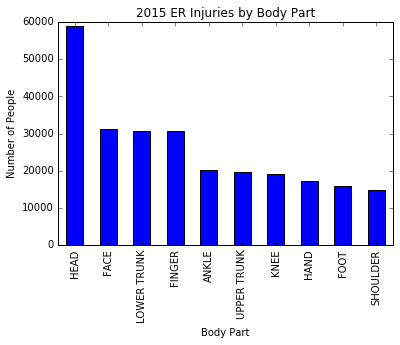

,age,CPSC Case #
,median,count
body_part_descrip,,
HEAD,36,58912
FACE,16,31104
LOWER TRUNK,48,30704
FINGER,26,30594
ANKLE,21,20148
UPPER TRUNK,46,19578
KNEE,27,19029
HAND,27,17140


In [303]:
#Injuries by Body Part

body_part = df1['body_part_descrip'].value_counts().head(10).plot(kind = 'bar', legend = None, title = '2015 ER Injuries by Body Part')
body_part.set_xlabel('Body Part')
body_part.set_ylabel('Number of People')                                    
plt.show()

body_part_table = {'CPSC Case #':['count'], 'age':['median']}

body_part_table2 = df1.groupby('body_part_descrip').agg(body_part_table).sort_values([('CPSC Case #', 'count')], ascending=False).head(10)
body_part_table2

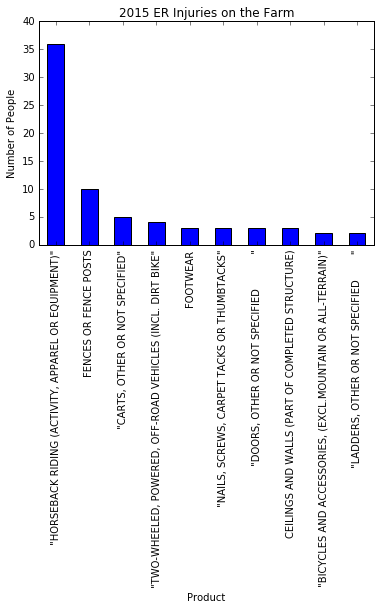

,age,CPSC Case #
,median,count
product1_descrip,,
"""HORSEBACK RIDING (ACTIVITY, APPAREL OR EQUIPMENT)""",24.5,36
FENCES OR FENCE POSTS,26.0,10
"""CARTS, OTHER OR NOT SPECIFIED""",10.0,5
"""TWO-WHEELED, POWERED, OFF-ROAD VEHICLES (INCL. DIRT BIKE""",21.5,4
CEILINGS AND WALLS (PART OF COMPLETED STRUCTURE),23.0,3
"""DOORS, OTHER OR NOT SPECIFIED """,15.0,3
FOOTWEAR,14.0,3
"""NAILS, SCREWS, CARPET TACKS OR THUMBTACKS""",32.0,3


In [304]:
#Injuries on the Farm
farm_locale = df1[df1['locale_descrip'].str.contains('FARM')]
farm_table = {'CPSC Case #':['count'], 'age':['median']}
farm_table2 = farm_locale.groupby('product1_descrip').agg(farm_table).sort_values([('CPSC Case #', 'count')], ascending=False).head(10)

farm = farm_locale['product1_descrip'].value_counts().head(10).plot(kind = 'bar', legend = None, title = '2015 ER Injuries on the Farm')
farm.set_xlabel('Product')
farm.set_ylabel('Number of People')
plt.show()

farm_table2

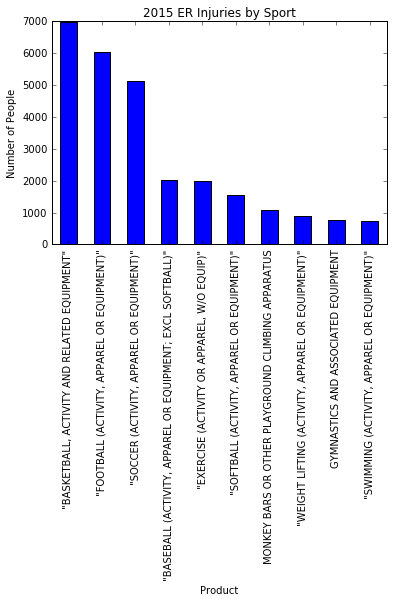

,age,CPSC Case #
,median,count
product1_descrip,,
"""BASKETBALL, ACTIVITY AND RELATED EQUIPMENT""",16.0,6987
"""FOOTBALL (ACTIVITY, APPAREL OR EQUIPMENT)""",14.0,6034
"""SOCCER (ACTIVITY, APPAREL OR EQUIPMENT)""",14.0,5127
"""BASEBALL (ACTIVITY, APPAREL OR EQUIPMENT; EXCL SOFTBALL)""",14.0,2022
"""EXERCISE (ACTIVITY OR APPAREL, W/O EQUIP)""",34.0,1999
"""SOFTBALL (ACTIVITY, APPAREL OR EQUIPMENT)""",17.0,1558
MONKEY BARS OR OTHER PLAYGROUND CLIMBING APPARATUS,6.0,1083
"""WEIGHT LIFTING (ACTIVITY, APPAREL OR EQUIPMENT)""",29.0,894


In [305]:
#Injuries by Sport
sports_locale = df1[df1['locale_descrip'].str.contains('SPORT')]
sports_table = {'CPSC Case #':['count'], 'age':['median']}
sports_table2 = sports_locale.groupby('product1_descrip').agg(sports_table).sort_values([('CPSC Case #', 'count')], ascending=False).head(10)

sport = sports_locale['product1_descrip'].value_counts().head(10).plot(kind = 'bar', legend = None, title = '2015 ER Injuries by Sport')
sport.set_xlabel('Product')
sport.set_ylabel('Number of People')
plt.show()

sports_table2

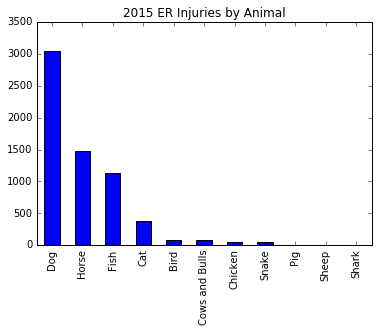

In [306]:
#Animal Injuries

dog_filter = df1[df1['Notes'].str.contains('DOG|PUPPY|ROTTWEILER|POODLE|GOLDEN RETRIEVER')]
cat_filter = df1[df1['Notes'].str.contains(' CAT |KITTEN')]
cat_filter = cat_filter[cat_filter['product1_descrip'].str.contains('FISHING') == False]
fish_filter = df1[df1['product1_descrip'].str.contains('FISHING') == True]
horse_filter = df1[df1['Notes'].str.contains('HORSE')]
chicken_filter = df1[df1['Notes'].str.contains('CHICKEN')]
chicken_filter = chicken_filter[chicken_filter['Notes'].str.contains('WIRE|DANCE|KNIFE|FRY') == False]
chicken_filter = chicken_filter[chicken_filter['product1_descrip'].str.contains('COOKWARE|KNIVES|REFRIGERATORS|HOT WATER|OVEN|TABLE') == False]
pig_filter = df1[df1['Notes'].str.contains(' PIG ')]
pig_filter = pig_filter[pig_filter['Notes'].str.contains('KNIFE|FRY') == False]
pig_filter = pig_filter[pig_filter['product1_descrip'].str.contains('COOKWARE|KNIVES|REFRIGERATORS|HOT WATER|OVEN|TABLE|TOYS|CHARCOAL') == False]
shark_filter = df1[df1['Notes'].str.contains('SHARK')]
shark_filter = shark_filter[shark_filter['Notes'].str.contains('PLAYING') == False]
sheep_filter = df1[df1['Notes'].str.contains(' SHEEP ')]
cow_filter = df1[df1['Notes'].str.contains(' COW | BULL |CATTLE')]
cow_filter = cow_filter[cow_filter['product1_descrip'].str.contains('ATTRACTIONS|TOYS') == False]
cow_filter = cow_filter[cow_filter['Notes'].str.contains('PIT|DOG') == False]
spider_filter = df1[df1['Notes'].str.contains('SPIDER')]
snake_filter = df1[df1['Notes'].str.contains('SNAKE')]
snake_filter = snake_filter[snake_filter['product1_descrip'].str.contains('DRAIN SNAKES') == False]
snake_filter = snake_filter[snake_filter['Notes'].str.contains('PLUMBING') == False]
bird_filter = df1[df1['Notes'].str.contains('BIRD')]

animal_injuries = [['Dog', len(dog_filter)], ['Cat', len(cat_filter)], ['Fish', len(fish_filter)], ['Horse', len(horse_filter)],
                  ['Chicken', len(chicken_filter)], ['Pig', len(pig_filter)], ['Shark', len(shark_filter)], ['Sheep', len(sheep_filter)],
                  ['Cows and Bulls', len(cow_filter)], ['Snake', len(snake_filter)], ['Bird', len(bird_filter)]]

animals = pd.DataFrame(animal_injuries, columns=('Animals', 'Count')).sort_values('Count', ascending = False)
animals_graph = animals['Count'].plot(kind = 'bar', legend = None, title = '2015 ER Injuries by Animal')
animals_graph.set_xticklabels(animals['Animals'])

plt.show()